In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, classification_report, f1_score

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [47]:
!pip install imblearn

You should consider upgrading via the 'C:\Users\ALDO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
df = pd.read_csv('loan_final313.csv', parse_dates=['year', 'issue_d'])
df.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,loan_amount,term,term_cat,application_type,application_type_cat,purpose,purpose_cat,interest_payments,interest_payment_cat,loan_condition,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011-01-01,2011-01-12,1012015,10.0,RENT,1,Low,24000,1,5000,36 months,1,INDIVIDUAL,1,credit_card,1,Low,1,Good Loan,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011-01-01,2011-01-12,1042013,0.5,RENT,1,Low,30000,1,2500,60 months,2,INDIVIDUAL,1,car,2,High,2,Bad Loan,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011-01-01,2011-01-12,1062014,10.0,RENT,1,Low,12252,1,2400,36 months,1,INDIVIDUAL,1,small_business,3,High,2,Good Loan,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011-01-01,2011-01-12,1012015,10.0,RENT,1,Low,49200,1,10000,36 months,1,INDIVIDUAL,1,other,4,High,2,Good Loan,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011-01-01,2011-01-12,1012016,1.0,RENT,1,Low,80000,1,3000,60 months,2,INDIVIDUAL,1,other,4,Low,1,Good Loan,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


## EDA

In [5]:
df.columns

Index(['id', 'year', 'issue_d', 'final_d', 'emp_length_int', 'home_ownership',
       'home_ownership_cat', 'income_category', 'annual_inc', 'income_cat',
       'loan_amount', 'term', 'term_cat', 'application_type',
       'application_type_cat', 'purpose', 'purpose_cat', 'interest_payments',
       'interest_payment_cat', 'loan_condition', 'loan_condition_cat',
       'interest_rate', 'grade', 'grade_cat', 'dti', 'total_pymnt',
       'total_rec_prncp', 'recoveries', 'installment', 'region'],
      dtype='object')

In [11]:
df.describe()

,id,final_d,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000
mean,3.246513e+07,1.047089e+06,6.050564,2.099130,7.502759e+04,1.196702,14755.264605,1.300045,1.000576,4.874621,1.475629,0.075987,13.246740,2.798403,18.157039,7558.826684,5757.706424,45.919243,436.717127
std,2.282734e+07,4.555149e+04,3.507405,0.944839,6.469815e+04,0.442542,8435.455601,0.458278,0.023990,2.381156,0.499406,0.264977,4.381867,1.312599,17.190626,7871.243336,6625.441046,409.693874,244.186593
min,5.473400e+04,1.012008e+06,0.500000,1.000000,0.000000e+00,1.000000,500.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.320000,1.000000,0.000000,0.000000,0.000000,0.000000,15.670000
25%,9.206643e+06,1.012016e+06,3.000000,1.000000,4.500000e+04,1.000000,8000.000000,1.000000,1.000000,3.000000,1.000000,0.000000,9.990000,2.000000,11.910000,1914.590000,1200.570000,0.000000,260.705000
50%,3.443327e+07,1.012016e+06,6.050000,3.000000,6.500000e+04,1.000000,13000.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12.990000,3.000000,17.650000,4894.999117,3215.320000,0.000000,382.550000
75%,5.490814e+07,1.092015e+06,10.000000,3.000000,9.000000e+04,1.000000,20000.000000,2.000000,1.000000,6.000000,2.000000,0.000000,16.200000,4.000000,23.950000,10616.814230,8000.000000,0.000000,572.600000
max,6.861706e+07,1.122015e+06,10.000000,6.000000,9.500000e+06,3.000000,35000.000000,2.000000,2.000000,14.000000,2.000000,1.000000,28.990000,7.000000,9999.000000,57777.579870,35000.030000,33520.270000,1445.460000


In [12]:
df.describe(include=object)

,home_ownership,income_category,term,application_type,purpose,interest_payments,loan_condition,grade,region
count,887379,887379,887379,887379,887379,887379,887379,887379,887379
unique,6,3,2,2,14,2,2,7,5
top,MORTGAGE,Low,36 months,INDIVIDUAL,debt_consolidation,Low,Good Loan,B,leinster
freq,443557,729616,621125,886868,524215,465316,819950,254535,214646


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    887379 non-null  int64         
 1   year                  887379 non-null  datetime64[ns]
 2   issue_d               887379 non-null  datetime64[ns]
 3   final_d               887379 non-null  int64         
 4   emp_length_int        887379 non-null  float64       
 5   home_ownership        887379 non-null  object        
 6   home_ownership_cat    887379 non-null  int64         
 7   income_category       887379 non-null  object        
 8   annual_inc            887379 non-null  int64         
 9   income_cat            887379 non-null  int64         
 10  loan_amount           887379 non-null  int64         
 11  term                  887379 non-null  object        
 12  term_cat              887379 non-null  int64         
 13 

In [14]:
df[['loan_condition_cat', 'loan_condition', 'interest_payments', 'interest_payment_cat', 'home_ownership', 'home_ownership_cat', 
'application_type', 'application_type_cat', 'grade_cat', 'grade']].head()

,loan_condition_cat,loan_condition,interest_payments,interest_payment_cat,home_ownership,home_ownership_cat,application_type,application_type_cat,grade_cat,grade
0,0,Good Loan,Low,1,RENT,1,INDIVIDUAL,1,2,B
1,1,Bad Loan,High,2,RENT,1,INDIVIDUAL,1,3,C
2,0,Good Loan,High,2,RENT,1,INDIVIDUAL,1,3,C
3,0,Good Loan,High,2,RENT,1,INDIVIDUAL,1,3,C
4,0,Good Loan,Low,1,RENT,1,INDIVIDUAL,1,2,B


In [15]:
df.isnull().sum()

id                      0
year                    0
issue_d                 0
final_d                 0
emp_length_int          0
home_ownership          0
home_ownership_cat      0
income_category         0
annual_inc              0
income_cat              0
loan_amount             0
term                    0
term_cat                0
application_type        0
application_type_cat    0
purpose                 0
purpose_cat             0
interest_payments       0
interest_payment_cat    0
loan_condition          0
loan_condition_cat      0
interest_rate           0
grade                   0
grade_cat               0
dti                     0
total_pymnt             0
total_rec_prncp         0
recoveries              0
installment             0
region                  0
dtype: int64

In [16]:
## Check how imbalanced TARGET is
df['loan_condition_cat'].value_counts()

0    819950
1     67429
Name: loan_condition_cat, dtype: int64

C:\Users\ALDO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\ALDO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


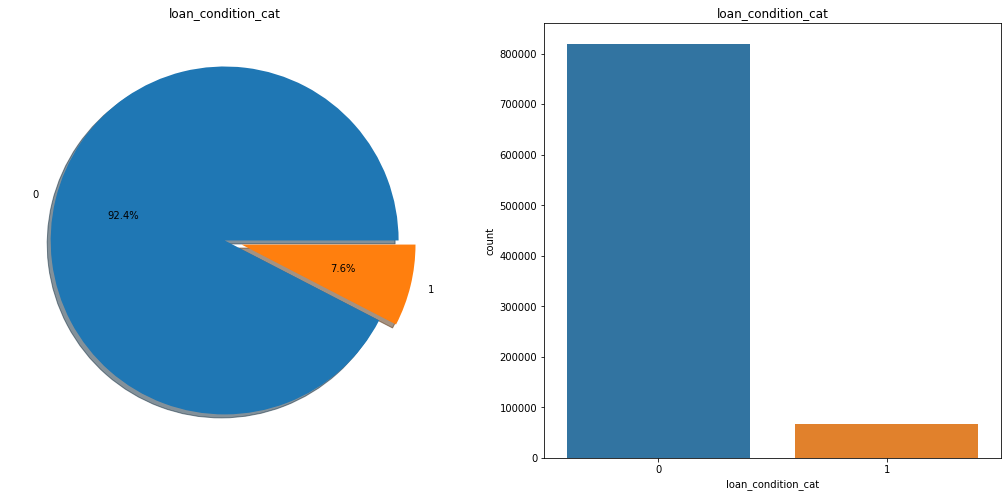

In [17]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['loan_condition_cat'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('loan_condition_cat')
ax[0].set_ylabel('')
sns.countplot('loan_condition_cat',data=df,ax=ax[1])
ax[1].set_title('loan_condition_cat')
plt.show()

In [18]:
df.groupby(['home_ownership','loan_condition'])['loan_condition'].count()

home_ownership  loan_condition
ANY             Good Loan              3
MORTGAGE        Bad Loan           29699
                Good Loan         413858
NONE            Bad Loan               8
                Good Loan             42
OTHER           Bad Loan              38
                Good Loan            144
OWN             Bad Loan            6293
                Good Loan          81177
RENT            Bad Loan           31391
                Good Loan         324726
Name: loan_condition, dtype: int64

In [19]:
df.groupby(['home_ownership','loan_condition', 'income_category'])['loan_condition'].count()

home_ownership  loan_condition  income_category
ANY             Good Loan       Low                     3
MORTGAGE        Bad Loan        High                  503
                                Low                 24358
                                Medium               4838
                Good Loan       High                11100
                                Low                313096
                                Medium              89662
NONE            Bad Loan        Low                     8
                Good Loan       Low                    38
                                Medium                  4
OTHER           Bad Loan        Low                    37
                                Medium                  1
                Good Loan       High                    3
                                Low                   130
                                Medium                 11
OWN             Bad Loan        High                   85
                        

In [21]:
df.groupby(['grade_cat', 'loan_condition'])['loan_condition'].count()

grade_cat  loan_condition
1          Bad Loan            3663
           Good Loan         144539
2          Bad Loan           13456
           Good Loan         241079
3          Bad Loan           19054
           Good Loan         226806
4          Bad Loan           15859
           Good Loan         123683
5          Bad Loan            9745
           Good Loan          60960
6          Bad Loan            4383
           Good Loan          18663
7          Bad Loan            1269
           Good Loan           4220
Name: loan_condition, dtype: int64

In [3]:
def analyze(column):
  data = {}
  data['Column'] = column.name
  data['Mean'] = st.mean(column)
  data['Mode'] = Counter(column).most_common()[0][0]
  data['Median'] = st.median(column)
  data['Variance'] = st.variance(column)
  data['Standard Deviation'] = st.stdev(column)
  data['Skew'] = column.skew()
  return pd.DataFrame([data])

def dataframe_analysis():
  result = pd.DataFrame()

  for col in df_num.columns:
    analysis = analyze(df[col])
    result = result.append(analysis)

  return result.reset_index(drop=True)

def plot_distribution(column):
  f, (ax_box, ax_hist) = plt.subplots(nrows=2, 
                                      sharex=True, 
                                      figsize=(8, 5),
                                      gridspec_kw={"height_ratios": {0.2, 1}})
  
  info = analyze(column)
  mean = info['Mean'].values[0]
  median = info['Median'].values[0]
  mode = info['Mode'].values[0]

  sns.boxplot(x=column, ax=ax_box)
  ax_box.axvline(mean, color='r', linestyle='--')
  ax_box.axvline(median, color='g', linestyle=':')
  ax_box.axvline(mode, color='b', linestyle='-')
  ax_box.set(xlabel='')

  sns.histplot(x=column, ax=ax_hist, kde=True)
  ax_hist.axvline(mean, color='r', linestyle='--')
  ax_hist.axvline(median, color='g', linestyle=':')
  ax_hist.axvline(mode, color='b', linestyle='-')

  plt.legend({'Mean':mean, 'Median':median, 'Mode':mode})
  plt.show()

In [23]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)
df_num.drop(['id', 'final_d'], axis=1, inplace=True)
df_num.head()

C:\Users\ALDO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
0,10.0,1,24000,1,5000,1,1,1,1,0,10.65,2,27.65,5861.071414,5000.00,0.00,162.87
1,0.5,1,30000,1,2500,2,1,2,2,1,15.27,3,1.00,1008.710000,456.46,117.08,59.83
2,10.0,1,12252,1,2400,1,1,3,2,0,15.96,3,8.72,3003.653644,2400.00,0.00,84.33
3,10.0,1,49200,1,10000,1,1,4,2,0,13.49,3,20.00,12226.302210,10000.00,0.00,339.31
4,1.0,1,80000,1,3000,2,1,4,1,0,12.69,2,17.94,3242.170000,2233.10,0.00,67.79


In [24]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   emp_length_int        887379 non-null  float64
 1   home_ownership_cat    887379 non-null  int64  
 2   annual_inc            887379 non-null  int64  
 3   income_cat            887379 non-null  int64  
 4   loan_amount           887379 non-null  int64  
 5   term_cat              887379 non-null  int64  
 6   application_type_cat  887379 non-null  int64  
 7   purpose_cat           887379 non-null  int64  
 8   interest_payment_cat  887379 non-null  int64  
 9   loan_condition_cat    887379 non-null  int64  
 10  interest_rate         887379 non-null  float64
 11  grade_cat             887379 non-null  int64  
 12  dti                   887379 non-null  float64
 13  total_pymnt           887379 non-null  float64
 14  total_rec_prncp       887379 non-null  float64
 15  

In [25]:
dataframe_analysis()

,Column,Mean,Mode,Median,Variance,Standard Deviation,Skew
0,emp_length_int,6.050564,10.00,6.050000,1.230189e+01,3.507405,-0.207943
1,home_ownership_cat,2.099130,3.00,3.000000,8.927198e-01,0.944839,-0.195079
2,annual_inc,75027.587860,60000.00,65000.000000,4.185851e+09,64698.154281,44.478587
3,income_cat,1.196702,1.00,1.000000,1.958432e-01,0.442542,2.157894
4,loan_amount,14755.264605,10000.00,13000.000000,7.115691e+07,8435.455601,0.681683
5,term_cat,1.300045,1.00,1.000000,2.100184e-01,0.458278,0.872637
6,application_type_cat,1.000576,1.00,1.000000,5.755222e-04,0.023990,41.636045
7,purpose_cat,4.874621,6.00,6.000000,5.669903e+00,2.381156,-0.512566
8,interest_payment_cat,1.475629,1.00,1.000000,2.494063e-01,0.499406,0.097601
9,loan_condition_cat,0.075987,0.00,0.000000,7.021280e-02,0.264977,3.200386


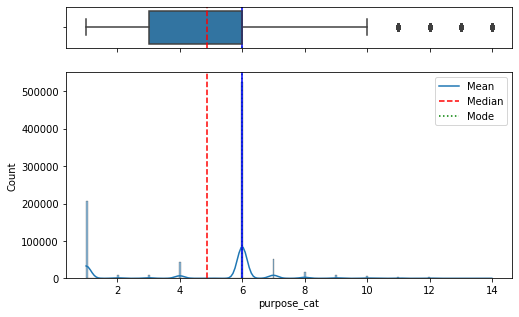

In [29]:
plot_distribution(df['purpose_cat'])

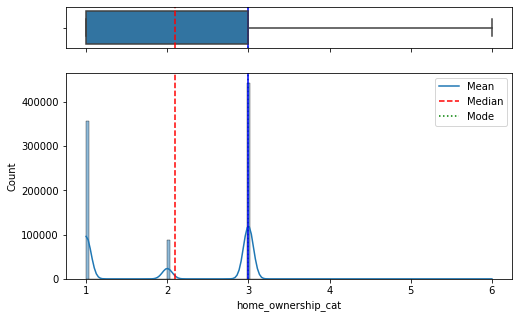

In [7]:
plot_distribution(df['home_ownership_cat'])

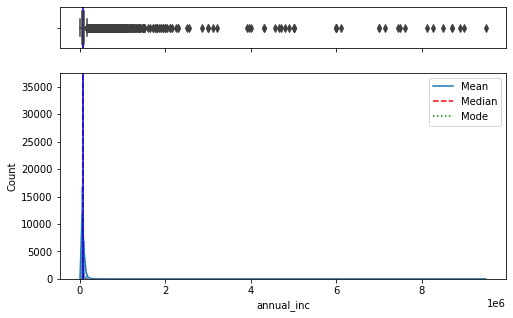

In [30]:
plot_distribution(df['annual_inc'])

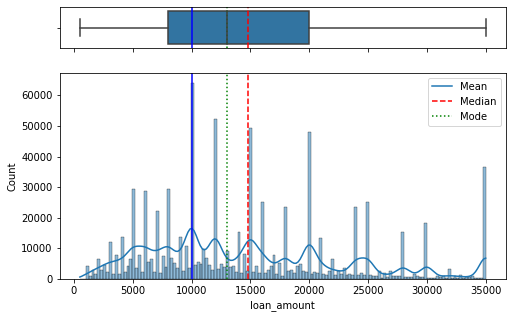

In [ ]:
plot_distribution(df['loan_amount'])

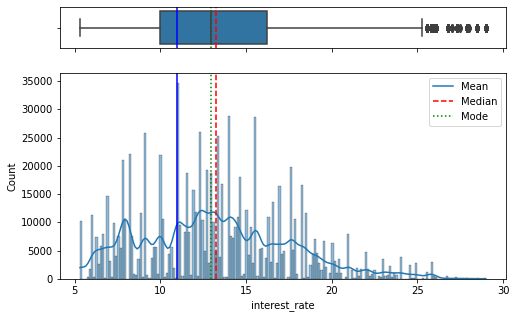

In [ ]:
plot_distribution(df['interest_rate'])

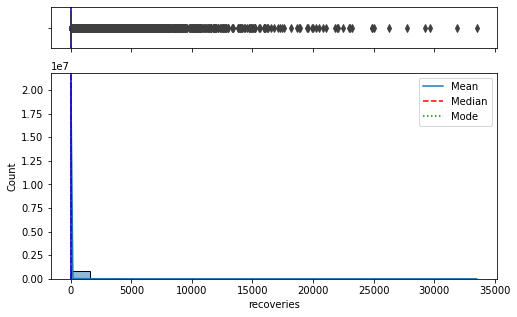

In [ ]:
plot_distribution(df['recoveries'])

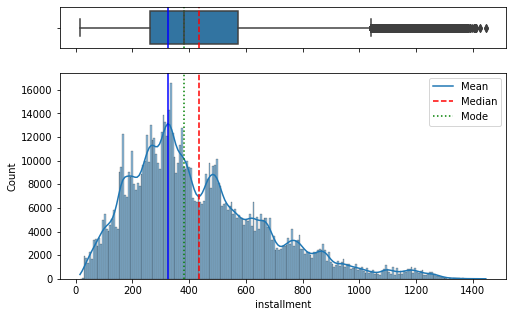

In [ ]:
plot_distribution(df['installment'])

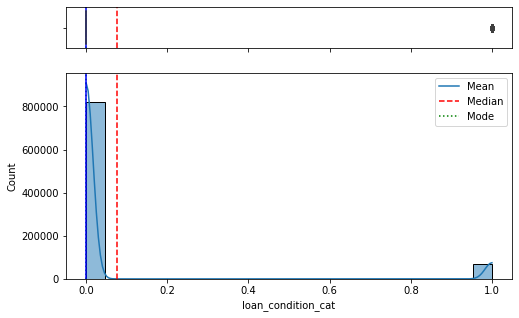

In [27]:
plot_distribution(df['loan_condition_cat'])

In [32]:
df_labeled = df.drop(['id','final_d', 'year','loan_condition', 'issue_d', 'home_ownership', 'income_category', 
              'term', 'application_type', 'purpose', 'interest_payments', 'loan_condition', 'grade', 'region'],axis=1 )

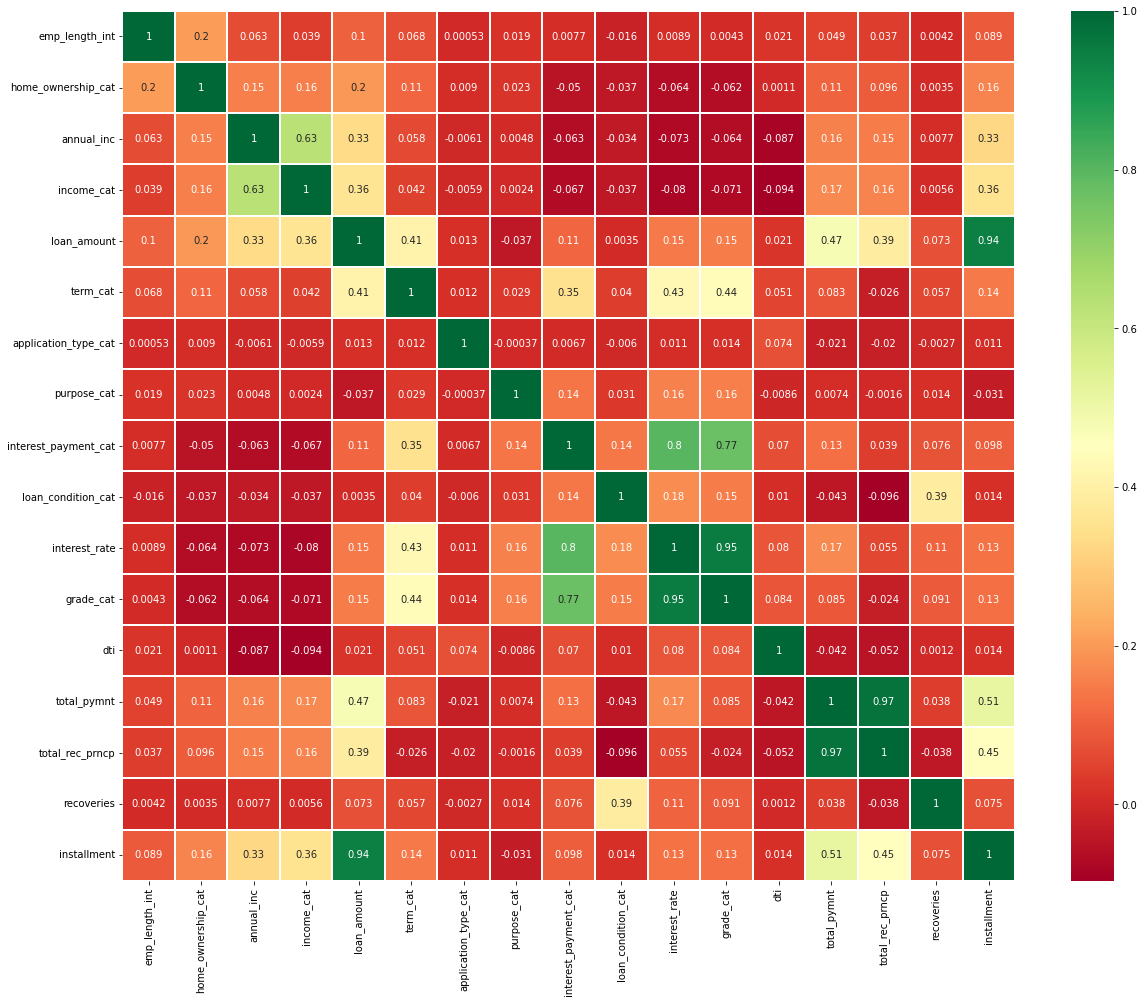

In [33]:
sns.heatmap(df_labeled.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #df.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20, 16)
plt.show()

### Hasil temuan dari EDA :

1. Terdapat data imbalance pada target di fitur ```loan_condition_cat```. Proporsinya adalah 92.4% untuk data major (good loan) dan 7.6% untuk data minor (default/bad loan). Kita akan mempersiapkan skenario untuk melakukan handling pada imbalanced data ini
2. Terdapat  fitur yang tidak relate dengan target variabel yaitu ```id```. Kita akan drop fitur ini
3. Encoding fitur ```region```.
3. Fitur ```year```, ```final_d``` dengan fitur ```issue_d``` adalah timestamp dan berdasarkan domain knowledge fitur ini tidak relate dengan target variabel (apalagi karena machine learning task tidak berfokus pada time series analysis) dan kita bisa drop fitur ini.
3. Terdapat fitur yang redundant karena merupakan hasil encoding dari fitur yang lain seperti ```loan_condition_cat``` adalah hasil encoding dari ```loan_condition```, ```interest_payment_cat``` dengan ```interest_payment```, dan lain-lain. Kita akan drop fitur yang mempunyai makna yang sama ini.
4. Berdasarkan appendix dan base domain knowledge, fitur ```recoveries``` ter-generate ketika borrower telah default. Karena objektif kita yang utama adalah memprediksi peluang default maka fitur ini akan menjadi counterintuitive. Kita akan drop fitur ini

## Preprocessing

In [ ]:
# Sebelum melakukan manipulasi dataframe asli, kita copy dataset asli ke variabel lain

temp = df.copy()

In [7]:
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])

In [8]:
# Drop the original 'loan_status' column
df.drop(columns = ['id','final_d', 'year','loan_condition', 'issue_d', 'home_ownership', 'income_category', 
'term', 'application_type', 'purpose', 'interest_payments', 'loan_condition', 'grade'], inplace = True)

## Data Splitting

Skenario Data splitting adalah train 60%, validation 20%, test 20%.

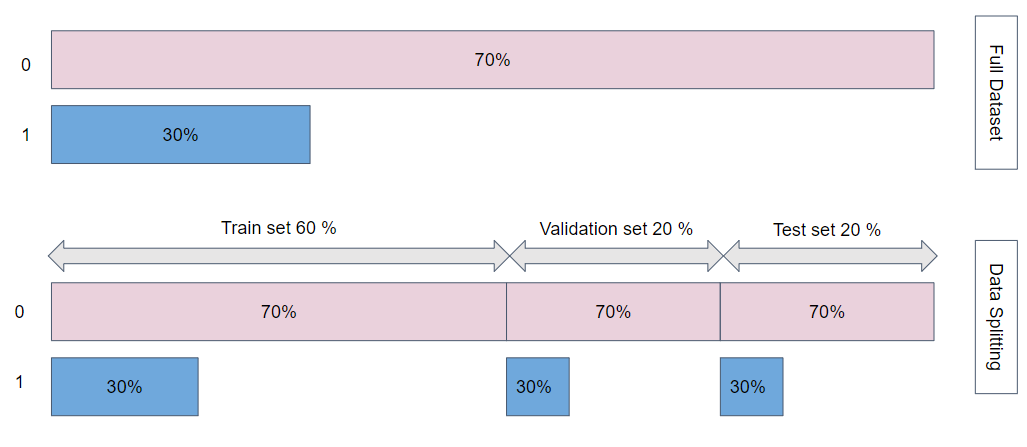

In [44]:
df.head()

,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,...,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,LoanAmntOverIncome,installmentOverLoanAmnt,totalPymntOverIncome,totalRecPrncpOverIncome
0,10.0,1,24000,1,5000,1,1,1,1,0,...,2,27.65,5861.071414,5000.00,0.00,162.87,0.208333,0.032574,0.244211,0.208333
1,0.5,1,30000,1,2500,2,1,2,2,1,...,3,1.00,1008.710000,456.46,117.08,59.83,0.083333,0.023932,0.033624,0.015215
2,10.0,1,12252,1,2400,1,1,3,2,0,...,3,8.72,3003.653644,2400.00,0.00,84.33,0.195886,0.035138,0.245156,0.195886
3,10.0,1,49200,1,10000,1,1,4,2,0,...,3,20.00,12226.302210,10000.00,0.00,339.31,0.203252,0.033931,0.248502,0.203252
4,1.0,1,80000,1,3000,2,1,4,1,0,...,2,17.94,3242.170000,2233.10,0.00,67.79,0.037500,0.022597,0.040527,0.027914


In [104]:
# Sebenarnya, karena ada timestamp pada dataset ini daripada menggunakan train_test_split kita bisa memisah data di tahun terakhir di dataset ini
# yaitu tahun 2015 sebagai test set. Namun jumlah data di tahun 2015 sangatlah besar, +- 47% dari keseluruhan observasi. Maka dari itu kita tetap
# menggunakan train_test_split

(df.groupby('year')['loan_condition'].count()/len(df)).round(4)* 100

year
2007     0.07
2008     0.27
2009     0.60
2010     1.41
2011     2.45
2012     6.01
2013    15.19
2014    26.55
2015    47.45
Name: loan_condition, dtype: float64

In [9]:
# inisialiasi X dan y
X = df.drop(columns=['loan_condition_cat'], axis = 1)
y = df['loan_condition_cat']

In [10]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, 
    y, 
    stratify = y,
    test_size = 0.2, 
    random_state = 2021)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val, 
    stratify = y_train_val,
    test_size = 0.25, 
    random_state = 2021)

In [66]:
# untuk memastikan konsistensi data dan menghindari SetttingWithCopyWarning di Pandas
X_train, X_test, X_val = X_train.copy(), X_test.copy(), X_val.copy()

## Feature Selection

Selanjutnya, kita akan melakukan feature selection untuk mengidentifikasi fitur yang paling cocok untuk masalah binary classisfication dan  kami menggunakan uji Chi-square untuk categorical feature dan ANOVA F-statistik untuk numerical feature.

In [67]:
X_train_num = X_train.select_dtypes(include = 'number').copy().reset_index()
X_train_num.drop(['index' , 'LoanAmntOverIncome', 'installmentOverLoanAmnt', 'totalPymntOverIncome', 'totalRecPrncpOverIncome'], axis = 1, inplace=True)

In [68]:
X_train_num.head()

,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
0,3.0,3,240000,3,20000,2,1,6,2,19.89,5,11.83,0.0000,0.00,0.0,528.66
1,8.0,3,70000,1,7000,1,1,8,1,12.49,2,18.12,3273.2400,2417.40,0.0,234.15
2,5.0,2,42000,1,10000,1,1,1,1,11.14,2,17.31,11153.6448,10000.00,0.0,328.06
3,4.0,1,41000,1,6000,1,1,6,1,12.49,2,15.01,2810.5300,2072.05,0.0,200.70
4,5.0,2,35000,1,15000,2,1,6,2,13.67,3,13.12,380.6400,175.59,0.0,346.47


In [69]:
X_train_num.shape

(532427, 16)

In [70]:
# f_class tidak bisa menerima missing value dan infinity value
X_train_num.fillna(X_train_num.mean(), inplace = True)

In [72]:
np.all(np.isfinite(X_train_num))

False

In [72]:
# Hitung F_statistic
F_statistic, p_values = f_classif(X_train_num, y_train)

In [73]:
# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': X_train_num.columns.values,
					'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)

In [74]:
ANOVA_F_table

,Numerical_Feature,F-Score,p values
0,recoveries,95221.302665,0.000000e+00
1,interest_rate,16696.963632,0.000000e+00
2,grade_cat,12156.046113,0.000000e+00
3,interest_payment_cat,10426.170006,0.000000e+00
4,total_rec_prncp,4887.710210,0.000000e+00
5,total_pymnt,947.372999,0.000000e+00
6,term_cat,832.532023,0.000000e+00
7,home_ownership_cat,716.120266,0.000000e+00
8,income_cat,656.287008,0.000000e+00
9,annual_inc,538.642869,0.000000e+00


Statistik F ANOVA untuk 15 fitur numerik menunjukkan rentang nilai F yang luas. Kita akan coba simpan 15 fitur ini untuk tetap digunakan dalam permodelan. Jika model yang dihasilkan kurang baik kita akan coba menggunakan fitur yang mempunyai ```p-value``` < 0.05 

## Cek Multicollinearity

<AxesSubplot:>

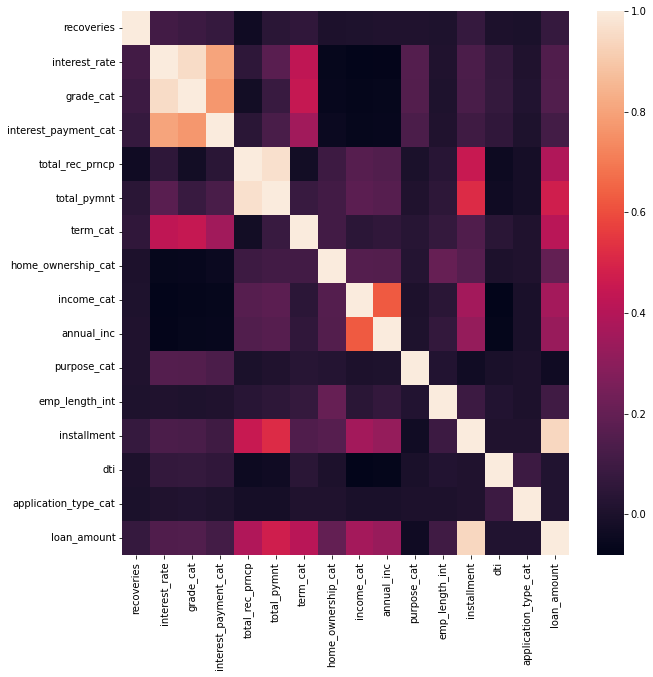

In [79]:
corrmat = X_train_num[ANOVA_F_table.iloc[:,0].to_list()].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat)

## Baseline Model Performance

Sebagai baseline, kita memakai 3 model berbasis ensemble learning:
1. Random Forest Classifier
2. Decision Tree Classifier
3. AdaBoost Classifier

In [11]:
rf = RandomForestClassifier(n_estimators=100)
dt = DecisionTreeClassifier(max_depth = 5)
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [91]:
for clfs, clf_name in zip([dt,rf,ada],['Decision Tree','Random Forest','AdaBoost']):
  clfs.fit(X_train, y_train)
  y_pred = clfs.predict(X_val)
  print(clf_name+":")
  print(classification_report(y_val,y_pred))
  print('Recall : ', recall_score(y_val,y_pred))

Decision Tree:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    163990
           1       1.00      0.37      0.54     13486

    accuracy                           0.95    177476
   macro avg       0.98      0.68      0.76    177476
weighted avg       0.95      0.95      0.94    177476

Recall :  0.36578674180631765
Random Forest:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    163990
           1       1.00      0.44      0.61     13486

    accuracy                           0.96    177476
   macro avg       0.98      0.72      0.79    177476
weighted avg       0.96      0.96      0.95    177476

Recall :  0.44156903455435265
AdaBoost:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    163990
           1       0.59      0.62      0.60     13486

    accuracy                           0.94    177476
   macro avg       0.78     

C:\Users\ALDO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


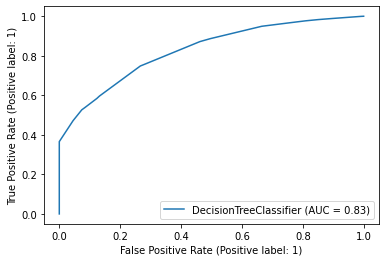

In [108]:
plot_roc_curve(dt, X_val, y_val)

C:\Users\ALDO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


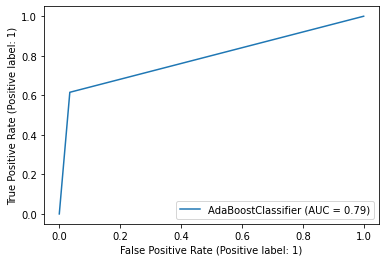

In [109]:
plot_roc_curve(ada, X_val, y_val)

C:\Users\ALDO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


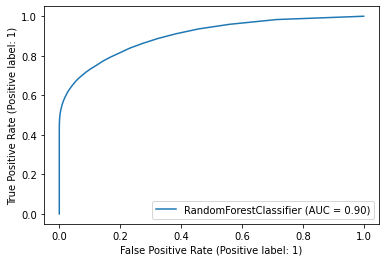

In [107]:
plot_roc_curve(rf, X_val, y_val)

## Undersampling

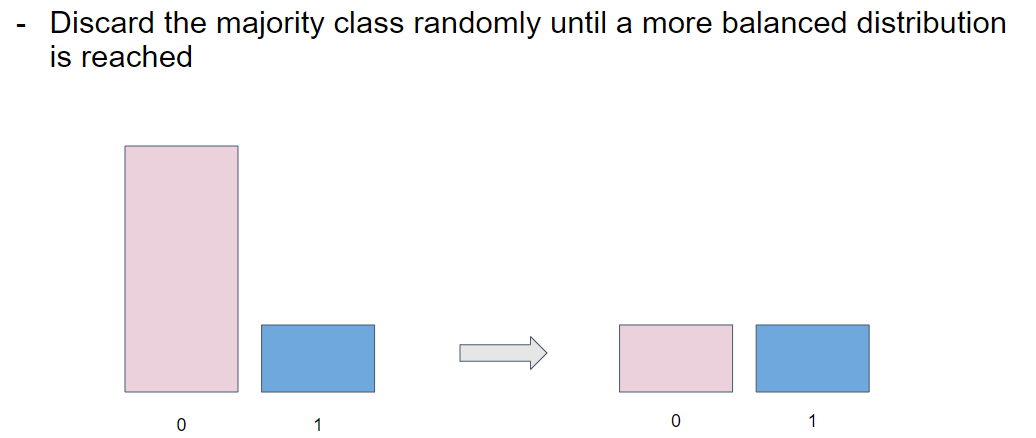

In [12]:
rus = RandomUnderSampler()
X_under, y_under = rus.fit_resample(X_train, y_train)

In [113]:
ada_under = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
ada_under.fit(X_under, y_under)
y_pred = ada_under.predict(X_val)
print(classification_report(y_val, y_pred))
print('Recall : ', recall_score(y_val,y_pred))


              precision    recall  f1-score   support

           0       0.97      0.76      0.85    163990
           1       0.21      0.76      0.33     13486

    accuracy                           0.76    177476
   macro avg       0.59      0.76      0.59    177476
weighted avg       0.92      0.76      0.81    177476

Recall :  0.7582678333086164


Random Undersampling dapat meningkatkan Recall hingga +-15%

C:\Users\ALDO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


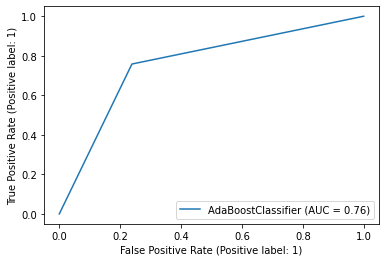

In [115]:
plot_roc_curve(ada_under, X_val, y_val)

## Oversampling : SMOTE

In [117]:
sm = SMOTE(random_state=101)
X_over, y_over = rus.fit_resample(X_train, y_train)

In [118]:
ada_over = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
ada_over.fit(X_under, y_under)
y_pred = ada_over.predict(X_val)
print(classification_report(y_val, y_pred))
print('Recall : ', recall_score(y_val,y_pred))


              precision    recall  f1-score   support

           0       0.97      0.76      0.85    163990
           1       0.21      0.76      0.33     13486

    accuracy                           0.76    177476
   macro avg       0.59      0.76      0.59    177476
weighted avg       0.92      0.76      0.81    177476

Recall :  0.7596025507934154


C:\Users\ALDO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


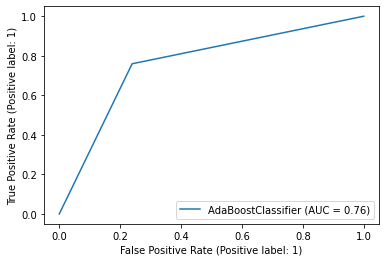

In [119]:
plot_roc_curve(ada_over, X_val, y_val)

Menggunakan oversampling dengan default parameter mendapatkan 76% recall.

In [120]:
print(X_train.shape)
print(X_test.shape)

(532427, 16)
(177476, 20)


## Combine Hyperparameter Tuning with Balancing Method

In [14]:
tree = DecisionTreeClassifier(max_depth = 3)

model_ada = AdaBoostClassifier(
    tree,
    n_estimators = 200,
    learning_rate = 0.1,
    random_state = 10
)

estimator = Pipeline([
                      ('clf',model_ada)                 
])

hyperparam_space = [
                    {'clf__learning_rate':[0.1],'clf__n_estimators':[200],'clf__base_estimator__max_depth':[3,4,5]},
                    {'clf__learning_rate':[0.05],'clf__n_estimators':[400],'clf__base_estimator__max_depth':[3,4,5]},
                    {'clf__learning_rate':[0.01],'clf__n_estimators':[2000],'clf__base_estimator__max_depth':[3,4,5]},
                    {'clf__learning_rate':[0.005],'clf__n_estimators':[4000],'clf__base_estimator__max_depth':[3,4,5]}
]

skfold = StratifiedKFold(n_splits = 5)

grid_search_ada = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'recall', # metrics
    n_jobs = -1 # use all cores
)

In [16]:
rus = RandomUnderSampler()
X_under, y_under = rus.fit_resample(X_train_val, y_train_val)

In [17]:
grid_search_ada.fit(X_under, y_under)
# running selama 240 menit

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('clf',
                                        AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                           learning_rate=0.1,
                                                           n_estimators=200,
                                                           random_state=10))]),
             n_jobs=-1,
             param_grid=[{'clf__base_estimator__max_depth': [3, 4, 5],
                          'clf__learning_rate': [0.1],
                          'clf__n_estimators': [200]},
                         {'clf__base_estimator__max_depth': [3, 4, 5],
                          'clf__learning_rate': [0.05],
                          'clf__n_estimators': [400]},
                         {'clf__base_estimator__max_depth': [3, 4, 5],
                          'clf__learning_rate': [0.01],
              

In [18]:
print('best score',grid_search_ada.best_score_)
print('best param',grid_search_ada.best_params_)

best score 0.8005487271667594
best param {'clf__base_estimator__max_depth': 5, 'clf__learning_rate': 0.005, 'clf__n_estimators': 4000}


In [19]:
grid_search_ada.best_estimator_.fit(X_under,y_under)

Pipeline(steps=[('clf',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                    learning_rate=0.005, n_estimators=4000,
                                    random_state=10))])

In [20]:
y_pred = grid_search_ada.best_estimator_.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89    163990
           1       0.27      0.79      0.40     13486

    accuracy                           0.82    177476
   macro avg       0.62      0.81      0.65    177476
weighted avg       0.93      0.82      0.86    177476



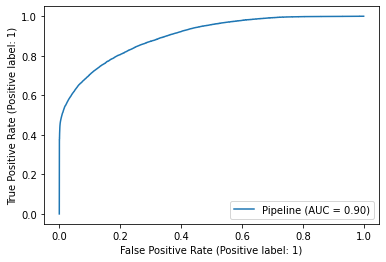

In [21]:
plot_roc_curve(grid_search_ada.best_estimator_, X_test, y_test)

In [15]:
randomized_search = RandomizedSearchCV(
    estimator, # model to tune
    param_distributions = hyperparam_space, # hyperparameter space
    n_iter = 20,
    cv = skfold, # evaluation method
    scoring = 'recall', # metrics
    random_state = 2021,
    n_jobs = -1 # use all cores
)

In [18]:
randomized_search.fit(X_under, y_under)
## running 271 menit

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('clf',
                                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                                 learning_rate=0.1,
                                                                 n_estimators=200,
                                                                 random_state=10))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions=[{'clf__base_estimator__max_depth': [3,
                                                                            4,
                                                                            5],
                                         'clf__learning_rate': [0.1],
                                         'clf__n_estimators': [200]},
                                        {'clf__base_estimator__max_depth'

In [20]:
print('best score',randomized_search.best_score_)
print('best param',randomized_search.best_params_)

best score 0.7868490143268939
best param {'clf__n_estimators': 4000, 'clf__learning_rate': 0.005, 'clf__base_estimator__max_depth': 5}


In [19]:
randomized_search.best_estimator_.fit(X_under,y_under)

Pipeline(steps=[('clf',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                    learning_rate=0.005, n_estimators=4000,
                                    random_state=10))])

In [21]:
y_pred = randomized_search.best_estimator_.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.90    163990
           1       0.27      0.79      0.40     13486

    accuracy                           0.82    177476
   macro avg       0.62      0.81      0.65    177476
weighted avg       0.93      0.82      0.86    177476



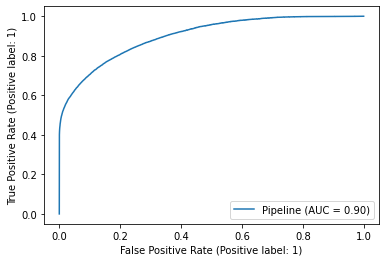

In [22]:
plot_roc_curve(randomized_search.best_estimator_, X_test, y_test)

Dari model Machine Learning yang dibuat, didapatkan performance akhir recall di 79% dimana terdapat kenaikan 18% dari baseline.
Hyperparameter tuning + undersampling bekerja dengan sangat baik pada model ini.
Untuk meningkatkan performance model yang sudah didapat saya sarankan untuk menggunakan lebih banyak skenario percobaan.